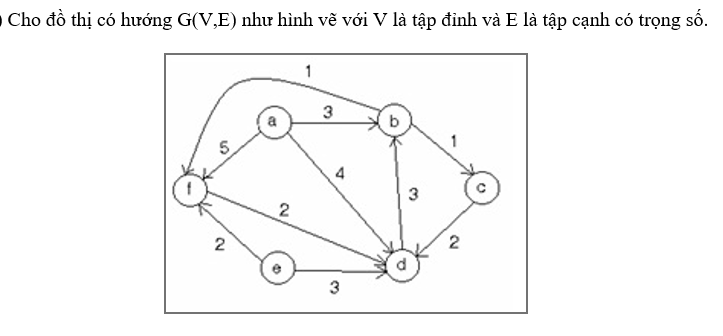

In [ ]:
#Tìm đường đi ngắn nhất từ c->f (Uniform cost first)
V = ["a","b","c","d","e","f"]
E = [(3,"a","b"),
     (5,"a","f"),
     (4,"a","d"),
     (1,"b","f"),
     (1,"b","c"),
     (2,"c","d"),
     (3,"d","b"),
     (3,"e","d"),
     (2,"e","f"),
     (2,"f","d")]

def move(x,E):
  res=[]
  for i in E:
    if i[1] == x:
      res.append(i)
  return res

from queue import PriorityQueue
Start = "c";
Close=[]
OK= False
End ="f"
Open =PriorityQueue()
#g,Vị trí,Tổ tiên
Open.put((0,Start,None))
while not Open.empty():
  O_TT = Open.get()
  O = O_TT[1]
  if O == End:
    OK= True
    break
  for i in move(O,E):
    if i not in Close:
      Open.put((O_TT[0]+i[0],i[2],O_TT))
      Close.append(i)

def MyPrint(O_TT):
    if(O_TT[2] != None):
        MyPrint(O_TT[2])
        print(O_TT[1] + "("+str(O_TT[0])+") -->",end="")
    else: 
        print(Start+"-->",end="")
if OK:
  MyPrint(O_TT)
  print("Finished")
else:
  print("Khong tim thay duong di")

c-->d(2) -->b(5) -->f(6) -->Finished


In [ ]:
from queue import PriorityQueue
#Người và quỷ sang sông
#Số người bên trái, Số quỷ bên trái, Vị trí thuyền, Số người bên phải, Số quỷ bên phải
Start = [3,3,0,0,0]
End = [0,0,1,3,3]

#Danh sach dinh con 
Open = []
#Danh sach dinh da duyet
Close = []

def Check(O):
  #Nếu số quỷ lớn hơn số người thì sai
  if O[0] > 0 and O[1] > O[0]:
    return False
  if O[3] > 0 and O[4] > O[3]:
    return False
  return True
def Generation(O):
  res = []
  #1. 2 người sang sông
  if O[2] == 0:
    if O[0] >= 2:
      child = [O[0]-2, O[1],1, O[3]+2, O[4]]
      if Check(child): res.append(child)
  else:
     if O[3] >= 2:
      child = [O[0]+2,O[1],0,O[3]-2,O[4]]
      if Check(child): res.append(child)

  #2. 2 quỷ sang sông
  if O[2] == 0:
    if O[1] >= 2:
      child = [O[0],O[1]-2,1,O[3],O[4]+2]
      if Check(child): res.append(child)
  else:
     if O[4] >= 2:
      child = [O[0],O[1]+2,0,O[3],O[4]-2]
      if Check(child): res.append(child)

  #3. 1 người sang sông
  if O[2] == 0:
    if O[0] >= 1:
      child = [O[0]-1,O[1],1,O[3]+1,O[4]]
      if Check(child): res.append(child)
  else:
     if O[3] >= 1:
      child = [O[0]+1,O[1],0,O[3]-1,O[4]]
      if Check(child): res.append(child) 

  #4. 2 quỷ sang sông
  if O[2] == 0:
    if O[1] >= 1:
      child = [O[0],O[1]-1,1,O[3],O[4]+1]
      if Check(child): res.append(child)
  else:
     if O[4] >= 1:
      child = [O[0],O[1]+1,0,O[3],O[4]-1]
      if Check(child): res.append(child) 
  
  #5. 1 người 1 quỷ sang sông
  if O[2] == 0:
    if O[1] >= 1 and O[0]>=1:
      child = [O[0]-1,O[1]-1,1,O[3]+1,O[4]+1]
      if Check(child): res.append(child)
  else:
     if O[4] >= 1 and O[3] >= 1:
      child = [O[0]+1,O[1]+1,0,O[3]-1,O[4]-1]
      if Check(child): res.append(child)

  return res
#Kiểm tra trạng thái tìm kiếm
OK= False
Open = PriorityQueue()
Open.put((0,Start,None))
Close.append(Start)
while not Open.empty():
  O_TT = Open.get()
  O = O_TT[1]
  Close.append(O)
  if O == End:
    OK = True
    break
  for child in Generation(O):
    if child not in Close:
      Open.put((O_TT[0]+1,child,O_TT))
      Close.append(child)

print(OK)
def MyPrint(O_TT):
  if O_TT[2] != None:
    MyPrint(O_TT[2])
    print(O_TT[1])
MyPrint(O_TT)

True
[2, 2, 1, 1, 1]
[3, 2, 0, 0, 1]
[3, 0, 1, 0, 3]
[3, 1, 0, 0, 2]
[1, 1, 1, 2, 2]
[2, 2, 0, 1, 1]
[0, 2, 1, 3, 1]
[0, 3, 0, 3, 0]
[0, 1, 1, 3, 2]
[0, 2, 0, 3, 1]
[0, 0, 1, 3, 3]


In [ ]:
# Trò chơi 24 số
from queue import PriorityQueue
import random
# # Goal = ((1,2,3),(4,5,6),(7,8,0))
# Goal =((1,2,3,4),(5,6,7,8),(9,10,11,12),(13,14,15,0))
Goal =( (1,2,3,4,5),
        (6,7,8,9,10),
        (11,12,13,14,15),
        (16,17,18,19,20),
        (21,22,23,24, 0) )
def ToaDoZero(board):
  n = len(board)
  for i in range(n):
    for j in range(n):
      if board[i][j] == 0: return i,j
#dir = 0 : Up
#dir = 1 : Down
#dir = 2 : Left
#dir = 3 : Right
def move(board,dir):
  L = [list(x) for x in board]
  n = len(L)
  i,j = ToaDoZero(L)
  #Up
  if dir == 0:
    if i < n-1:
      L[i][j] = L[i+1][j]
      L[i+1][j] = 0
      return tuple(tuple(x) for x in L)
  #Down
  if dir == 1:
    if i > 0:
      L[i][j] = L[i-1][j]
      L[i-1][j] = 0
      return tuple(tuple(x) for x in L)  
  #Left
  if dir == 2:
    if j < n-1:
      L[i][j] = L[i][j+1]
      L[i][j+1] = 0
      return tuple(tuple(x) for x in L)
  #Right
  if dir == 3:
    if j > 0:
      L[i][j] = L[i][j-1]
      L[i][j-1] = 0
      return tuple(tuple(x) for x in L)    
  return None

#Kiểm tra trạng thái tìm kiếm
OK= False
Start = Goal
for _ in range(50000):
  O = move(Start,random.randint(0,3))
  if O != None: Start = O

def distance(O, Goal):
  n = len(O)
  count=0
  for i in range(n):
    for j in range(n):
      if O[i][j] != Goal[i][j]:
        count +=1
  return count

def distance2(O,Goal):
  n = len(O)
  res=0
  for i in range(n):
    for j in range(n):
      if O[i][j] != 0:
        ii = (O[i][j] -1)/ n 
        jj = (O[i][j]  -1)% n
        res += abs(i - ii) + abs(j - jj)
  return res
Open = PriorityQueue()
#Khoảng cách đến vị trí bắt đầu, Trạng thái bắt đầu, Hướng di chuyển, Tổ tiên
Open.put( ((0,0),Start,None, None) )
Close = {Start}
Count = 1;

while not Open.empty():
  Count+=1
  O_TT = Open.get()
  # Gán trạng thái bắt đầu bằng tổ tiên
  O = O_TT[1]
  if O == Goal:
    OK = True
    break
  for i in range(4):
    child =   move(O,i)
    if child != None and child not in Close:
      g =O_TT[0][1]+1
      h = distance2(child, Goal)
      f = 0.1*g+0.9*h
      Open.put(((f,g),child,i,O_TT))
      Close.add(child)



def MyPrint(O_TT):
  if O_TT[3] != None:
    MyPrint(O_TT[3])
    print(O_TT[2])
  for _ in  O_TT[1]: print(_)
MyPrint(O_TT)
print(OK, Count)

(14, 0, 7, 6, 19)
(9, 11, 5, 18, 15)
(21, 20, 4, 16, 22)
(1, 24, 10, 23, 13)
(12, 8, 2, 3, 17)
2
(14, 7, 0, 6, 19)
(9, 11, 5, 18, 15)
(21, 20, 4, 16, 22)
(1, 24, 10, 23, 13)
(12, 8, 2, 3, 17)
2
(14, 7, 6, 0, 19)
(9, 11, 5, 18, 15)
(21, 20, 4, 16, 22)
(1, 24, 10, 23, 13)
(12, 8, 2, 3, 17)
0
(14, 7, 6, 18, 19)
(9, 11, 5, 0, 15)
(21, 20, 4, 16, 22)
(1, 24, 10, 23, 13)
(12, 8, 2, 3, 17)
3
(14, 7, 6, 18, 19)
(9, 11, 0, 5, 15)
(21, 20, 4, 16, 22)
(1, 24, 10, 23, 13)
(12, 8, 2, 3, 17)
1
(14, 7, 0, 18, 19)
(9, 11, 6, 5, 15)
(21, 20, 4, 16, 22)
(1, 24, 10, 23, 13)
(12, 8, 2, 3, 17)
2
(14, 7, 18, 0, 19)
(9, 11, 6, 5, 15)
(21, 20, 4, 16, 22)
(1, 24, 10, 23, 13)
(12, 8, 2, 3, 17)
2
(14, 7, 18, 19, 0)
(9, 11, 6, 5, 15)
(21, 20, 4, 16, 22)
(1, 24, 10, 23, 13)
(12, 8, 2, 3, 17)
0
(14, 7, 18, 19, 15)
(9, 11, 6, 5, 0)
(21, 20, 4, 16, 22)
(1, 24, 10, 23, 13)
(12, 8, 2, 3, 17)
3
(14, 7, 18, 19, 15)
(9, 11, 6, 0, 5)
(21, 20, 4, 16, 22)
(1, 24, 10, 23, 13)
(12, 8, 2, 3, 17)
3
(14, 7, 18, 19, 15)
(9, 11, 0,

In [ ]:
from queue import PriorityQueue
m,n = map(int, input().split())
Maze = []
for i in range(m):
    Maze.append(list(input()))

def move(O, maze):
    res=[] 
    n = len(maze)
    m = len(maze[0])
    i = O[0]
    j= O[1]    
    if i+1 < n:
        if maze[i+1][j] != "#":
            child = [i+1,j]
            res.append(child)
    if j+1 < m:    
        if maze[i][j+1] != "#":
            child = [i,j+1]
            res.append(child)
    if i > 0:    
        if maze[i-1][j] != "#":
            child = [i-1,j]
            res.append(child)     
    if j > 0:
        if maze[i][j-1] != "#" :
            child = [i,j-1]
            res.append(child)
    return res

Start= [0,0]
Goal= [m-1, n-1]
Open = PriorityQueue()
#Uniform cost, Position, Tổ tiên
Open.put([0,Start, None])
final = -1
Visited = [Start]
while not Open.empty():
    O_TT =  Open.get()
    O = O_TT[1]
    if O == Goal:
        final = O_TT[0]
        break
    for i in move(O, Maze):
        if i not in Visited:
            Open.put([O_TT[0]+1,i,O_TT])
            Visited.append(i)
list_tmp=[]
def MyPrint(O_TT):
    if O_TT[2] != None:
        MyPrint(O_TT[2])
        list_tmp.append(O_TT[1])
        print(O_TT[1])
if final != -1:
    MyPrint(O_TT)
    print(final)
for i in range(m):
    for j in range(n):
        if [i,j] in list_tmp:
            Maze[i][j]=0
        print(Maze[i][j],end="")
    print("\n")

# 10 10
# ..#.......
# #...######
# ......#..#
# ##...#....
# ........#.
# ...######.
# #.#..####.
# ..#.......
# ..####....
# .......#..
#20

10 10
..#.......
#...######
......#..#
##...#....
........#.
...######.
#.#..####.
..#.......
..####....
.......#..
[0, 1]
[1, 1]
[1, 2]
[1, 3]
[2, 3]
[2, 4]
[3, 4]
[4, 4]
[4, 5]
[4, 6]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[5, 9]
[6, 9]
[7, 9]
[8, 9]
[9, 9]
20
.0#.......

#000######

...00.#..#

##..0#0000

....000.#0

...######0

#.#..####0

..#......0

..####...0

.......#.0



In [ ]:
# Tic-Tac-Toe
import numpy as np 
import random 
from time import sleep 
  
# Tạo bàn cờ rỗng
def create_board(): 
    return(np.array([[0, 0, 0], 
                     [0, 0, 0], 
                     [0, 0, 0]])) 
  
# Kiểm tra danh sách còn rỗng
def possibilities(board): 
    l = [] 
      
    for i in range(len(board)): 
        for j in range(len(board)): 
              
            if board[i][j] == 0: 
                l.append((i, j)) 
    return(l) 
  
# chọn ngẫu nhiên
def random_place(board, player): 
    selection = possibilities(board) 
    current_loc = random.choice(selection) 
    board[current_loc] = player 
    return(board) 
  
# kiểm tra thắng theo cột
def row_win(board, player): 
    for x in range(len(board)): 
        win = True
          
        for y in range(len(board)): 
            if board[x, y] != player: 
                win = False
                continue
                  
        if win == True: 
            return(win) 
    return(win) 
  
# kiểm tra thắng theo dòng
def col_win(board, player): 
    for x in range(len(board)): 
        win = True
          
        for y in range(len(board)): 
            if board[y][x] != player: 
                win = False
                continue
                  
        if win == True: 
            return(win) 
    return(win) 
  
# kiểm tra thắng theo đường chéo
def diag_win(board, player): 
    win = True
    y = 0
    for x in range(len(board)): 
        if board[x, x] != player: 
            win = False
    if win: 
        return win 
    win = True
    if win: 
        for x in range(len(board)): 
            y = len(board) - 1 - x 
            if board[x, y] != player: 
                win = False
    return win 
  
# Đánh giá thắng thua  
def evaluate(board): 
    winner = 0
      
    for player in [1, 2]: 
        if (row_win(board, player) or
            col_win(board,player) or 
            diag_win(board,player)): 
                 
            winner = player 
              
    if np.all(board != 0) and winner == 0: 
        winner = -1
    return winner 

pc = 2

# Đánh giá cục diện trận đấu
def value(board):
  v = evaluate(board);
  if v == pc:
    return 1
  elif v == 3 - pc:
    return -1
  else:
    return 0

# thuật toán minimax
def minimax(board, d, player):
  if d==0 or evaluate(board)!=0:
    return board, value(board)
  if player == pc:
    max,bmax = -10,1;
    for l in possibilities(board):
      child = np.copy(board)
      child[l] = player
      b,v = minimax(child,d-1,3-player)
      if max<=v:
        max,bmax = v,child
    return bmax,max
  else:
    min,bmin = 10,1;
    for l in possibilities(board):
      child = np.copy(board)
      child[l] = player
      b,v = minimax(child,d-1,3-player)
      if min>=v:
        min,bmin = v,child
    return bmin,min

# lựa chọn nước đi sử dụng minimax
def minimax_place(board):
  b, v = minimax(board,1,pc)
  return b;

# chọn thủ công
def hand_place(board, player): 
    selection = possibilities(board) 
    i,j = map(int,input().split())
    if (i,j) in selection:
      board[i,j] = player 
    return(board) 

# Main function to start the game 
def play_game(): 
    board, winner, counter = create_board(), 0, 1
    print(board) 
      
    while winner == 0: 
        for player in [1, 2]: 
            if player == pc:
              print("PC move") 
              board = minimax_place(board)
            else:
              print("you move") 
              board = hand_place(board, player) 
            
           
            print(board) 
            counter += 1
            winner = evaluate(board) 
            if winner != 0: 
                break
    return(winner) 
  
# Driver Code 
print("Winner is: " + str(play_game())) 

In [ ]:
import random as rd
from PIL import Image
import requests

D = [(0,3),(2,0),(0,4),(4,1)]

def distance2(a,b):
  dis = 0
  for i in range(len(a)):
    dis += (a[i]-b[i])**2
  return dis

def argminDistance(p,mu):
  id = -1
  mindis = 0
  for i in range(len(mu)):
    dis = distance2(p,mu[i])
    if id ==-1 or mindis>dis:
      mindis = dis
      id = i
  return id  

def mysum(a,b):
  s = [0]*len(a)
  for i in range(len(a)):
    s[i] = a[i]+b[i]
  return s

def kmean(D,k):
  n = len(D)
  # B1: chọn ngẫu nhiên k phần tử để làm tâm của k nhóm
  mu = rd.sample(D,k)
  C = [0]*n
  while True:
    cothaydoi = False
    # B2: phân nhóm theo nguyên tắc gần trọng tâm nhóm nào thì phân vào nhóm đó
    for i in range(n):
      c = argminDistance(D[i],mu)
      if (C[i]!=c):
        cothaydoi = True
      C[i] = c
    if not cothaydoi:
      break
    # B3: tính lại trọng tâm của k nhóm
    mu = [tuple([0]*len(mu[0]))]*len(mu)
    sl = [0]*len(mu)
    for i in range(n):
      mu[C[i]] = mysum(mu[C[i]],D[i]) 
      sl[C[i]] +=1
    for i in range(len(mu)):
      if sl[i] == 0:
        mu[i] = rd.choice(D)
      else:
        mu[i] = [x/sl[i] for x in mu[i]]
    # B4: quay lại buoc 2 nếu như có sự thay đổi
  return C,mu

print(D)
print(kmean(D,2))


[(0, 3), (2, 0), (0, 4), (4, 1)]
([0, 1, 0, 1], [[0.0, 3.5], [3.0, 0.5]])


In [ ]:
# code tối ưu tốc độ